# **Importing Dependencies and Data**

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import tensorflow as tf
tf.random.set_seed(46)


2024-06-09 18:30:34.315294: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-09 18:30:34.315436: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-09 18:30:34.465136: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
df=pd.read_csv("/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# **EDA**

## Understanding Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


> * #### The data contains 7043 rows and 21 Columns, having no null values 
> * #### Most of the data is Categorical in nature

In [5]:
categorical=[ col for col in df.columns if df[col].dtype=="object"]
print(categorical)

['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']


In [6]:
for col in categorical:
    print(f"***************{col}****************")
    print(f" Total number of unique features: {len(df[col].unique())}")
    print("**************************************")
        
    print(df[col].value_counts())

***************customerID****************
 Total number of unique features: 7043
**************************************
customerID
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: count, Length: 7043, dtype: int64
***************gender****************
 Total number of unique features: 2
**************************************
gender
Male      3555
Female    3488
Name: count, dtype: int64
***************Partner****************
 Total number of unique features: 2
**************************************
Partner
No     3641
Yes    3402
Name: count, dtype: int64
***************Dependents****************
 Total number of unique features: 2
**************************************
Dependents
No     4933
Yes    2110
Name: count, dtype: int64
***************PhoneService****************
 Total number of unique features: 2
**************************************
PhoneSer

> * #### Few Categorical Columns have Binary Values (yes,no)
> * #### Most Categorical Columns have more than 2 classes 
> * #### TotalCharges has the wrong DataType

In [7]:
check= df.loc[df['TotalCharges'] == " "]
check

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [8]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].dtypes

dtype('float64')

In [9]:
df["TotalCharges"].isnull().sum()

11

In [10]:
df=df.dropna()
df["TotalCharges"].isnull().sum()

0

> * #### Changed the data type of TotalCharges and removed rows with Null values 

In [11]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


## Data Visualization

In [12]:
sns.pairplot(df,x_vars=["tenure","MonthlyCharges","TotalCharges"],y_vars=["tenure","MonthlyCharges","TotalCharges"], hue ="Churn")

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

> * #### There is a slight relationship between Monthly Charges and Total Charges but thats a given 
> * #### There is a relationship between TotalCharges and Tenure

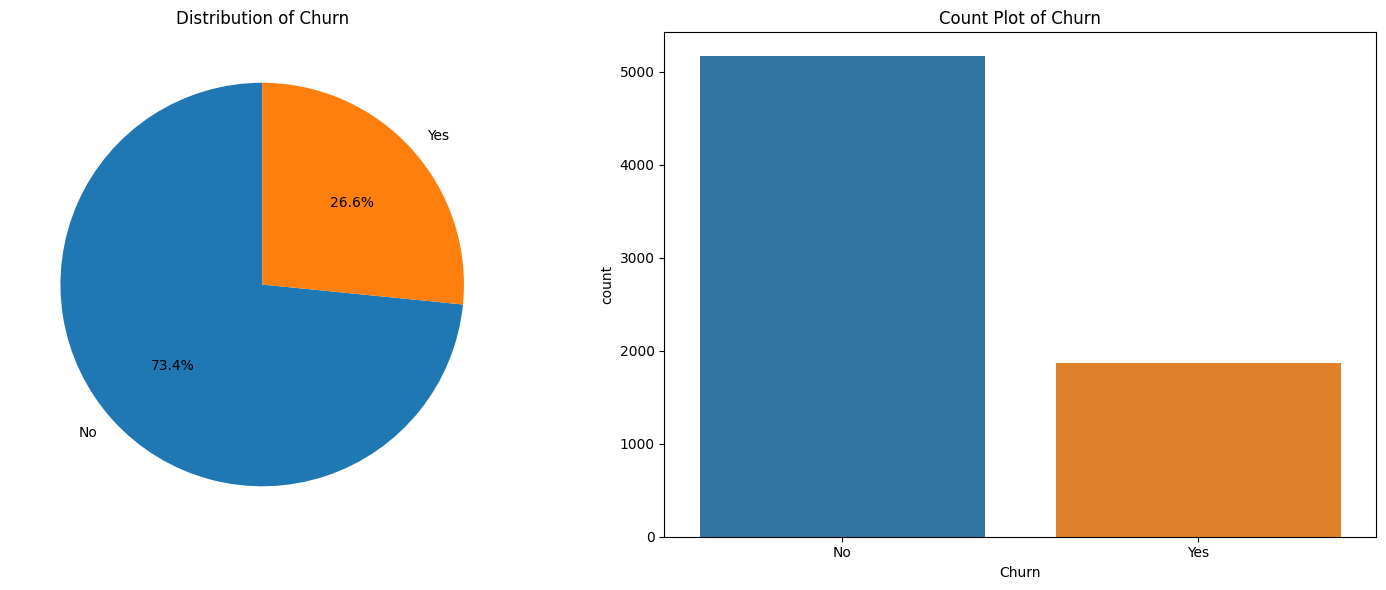

In [13]:
# Distribution of Churn
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
status_counts = df['Churn'].value_counts()
axes[0].pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Distribution of Churn')
sns.countplot(x='Churn', data=df, ax=axes[1])
axes[1].set_title('Count Plot of Churn')

plt.tight_layout()
plt.show()


> * #### The plot shows that the data is highly skewed which needs to be balancend to optimize model performance

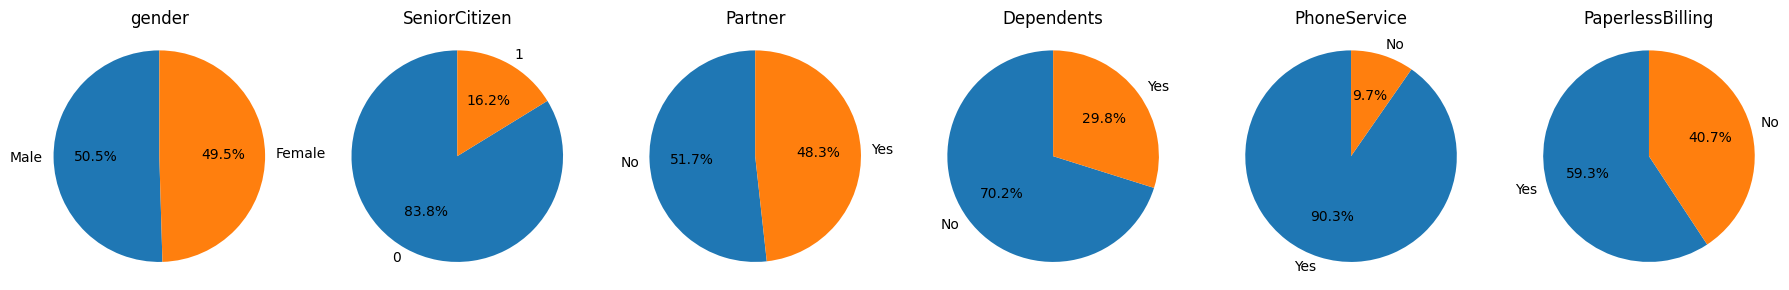

In [14]:
binary_variables=["gender","SeniorCitizen","Partner","Dependents","PhoneService","PaperlessBilling"]
plt.figure(figsize=(18, 3))
for i,col in enumerate(binary_variables,1):
    plt.subplot(1, 6, i)
    counts = df[col].value_counts(normalize=True)
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
    plt.title(f'{col}')
    plt.axis('equal')  
plt.tight_layout()
plt.show()

> * #### The data has even repesentation from both genders, married and batchlors
> * #### The data consist of Yound and Independent individuals

In [15]:
categorical=[ col for col in df.columns if df[col].dtype=="object"][1:-1]
print(categorical)
print(len(categorical))

['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
15


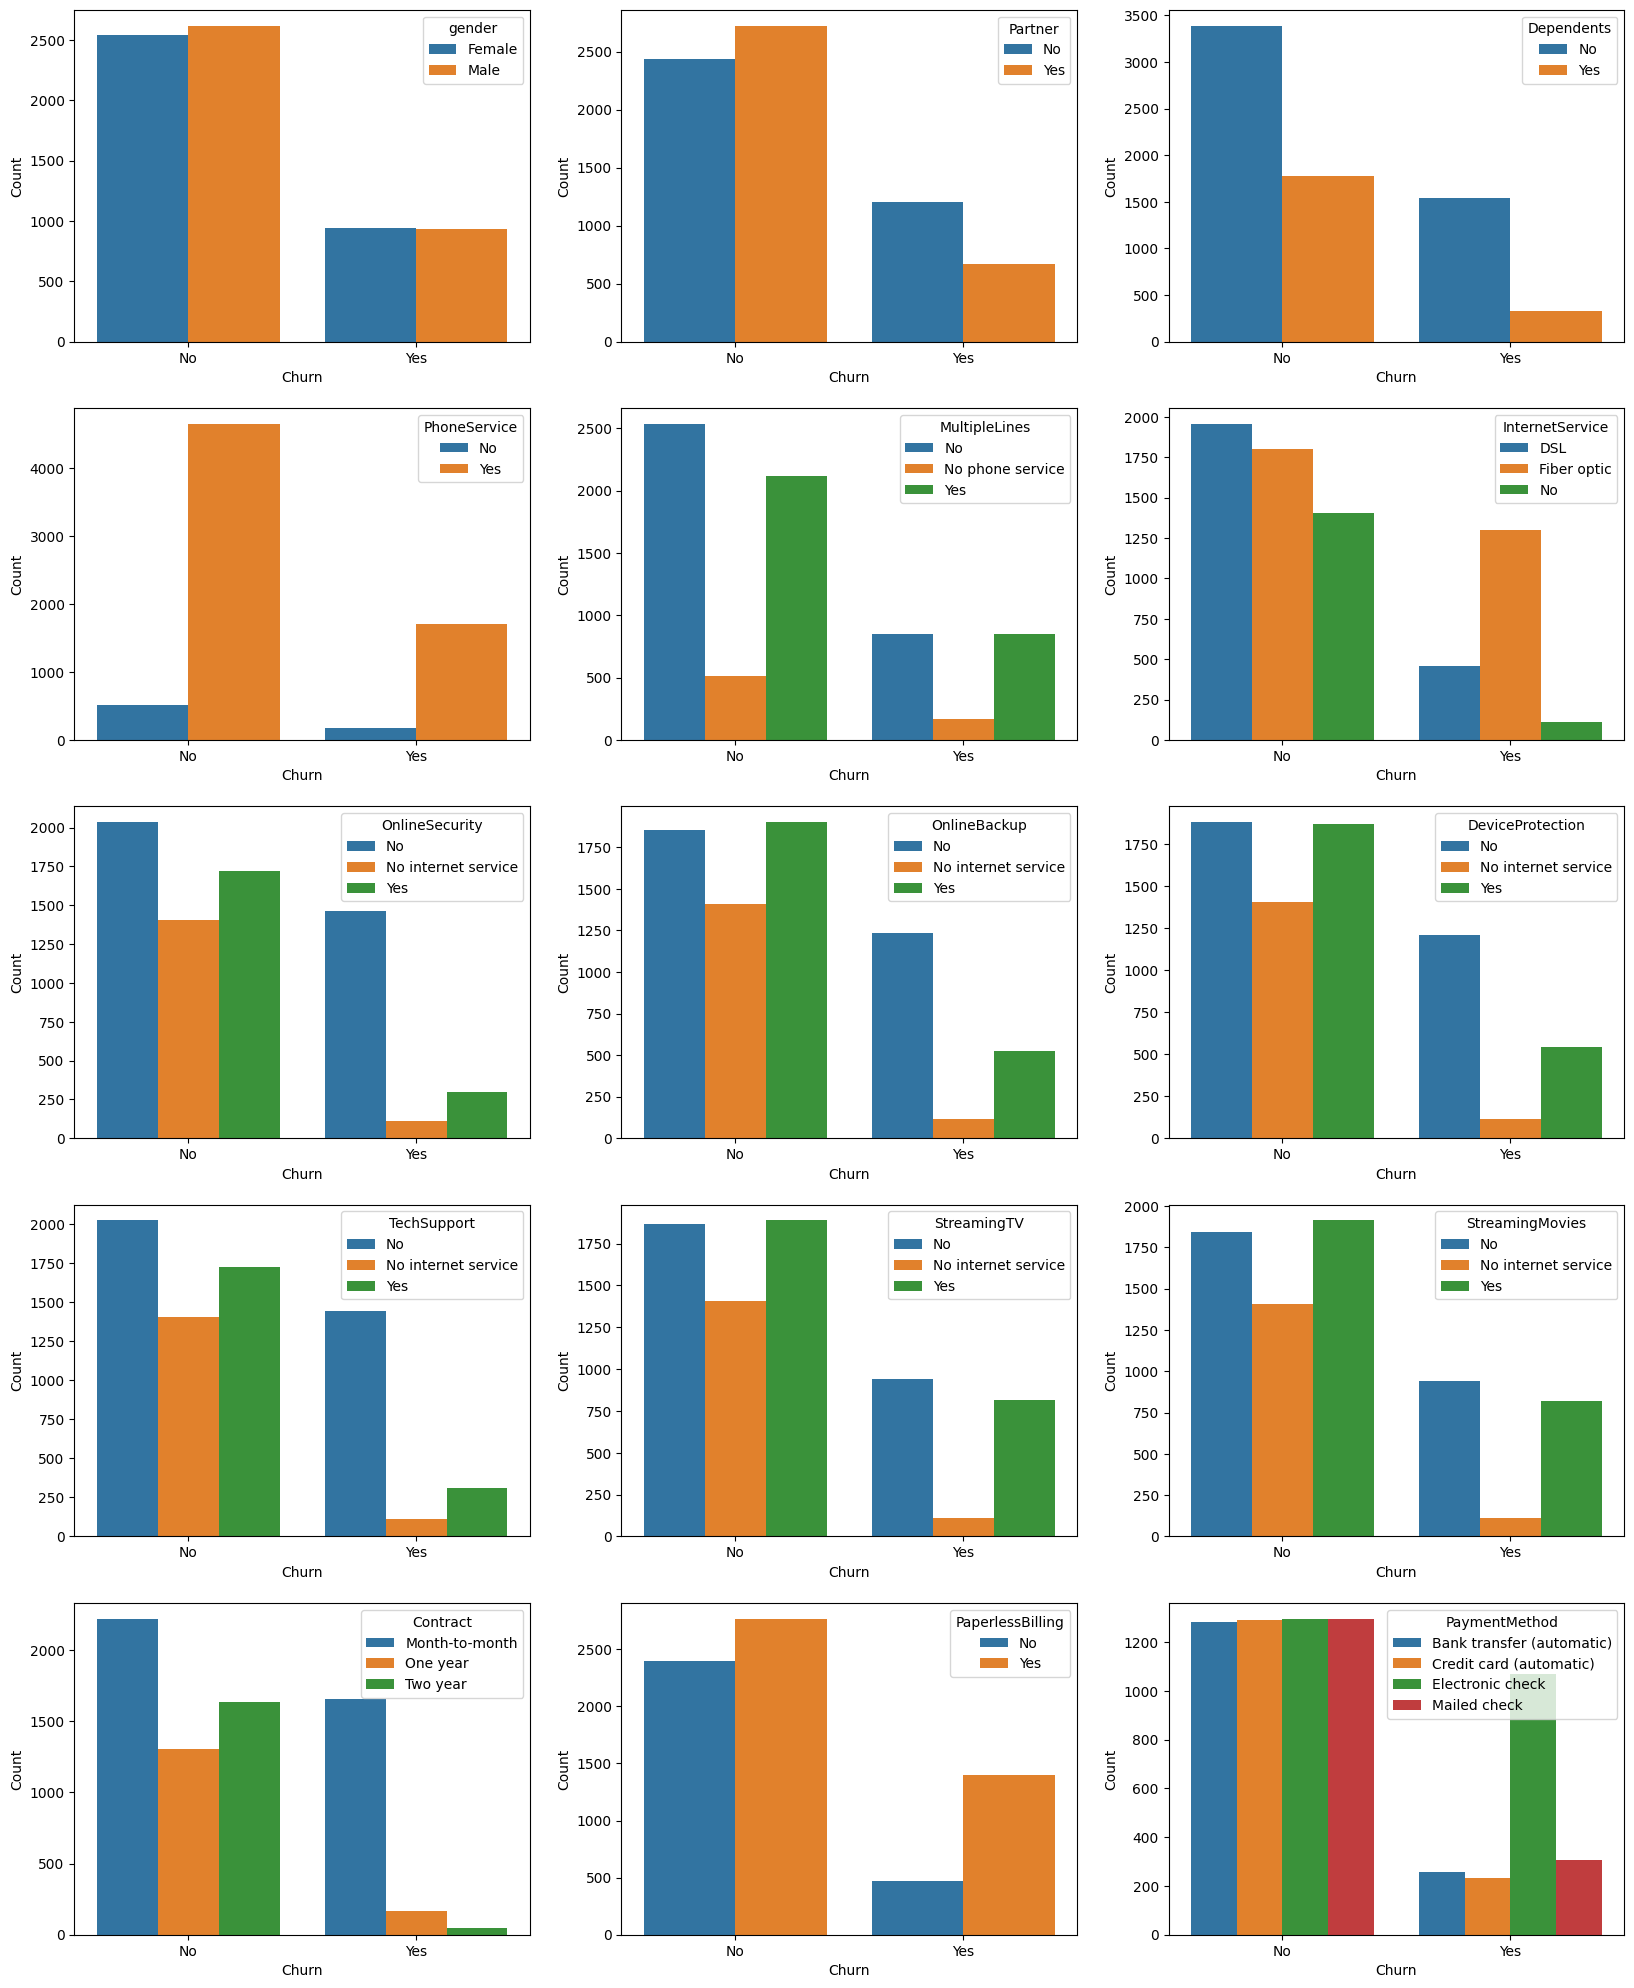

In [16]:
fig, axes = plt.subplots(5,3, figsize=(20, 25))
for i,col in enumerate(categorical,0):
    temp = df.groupby(['Churn',col], as_index=False)['customerID'].count()
    temp.columns = ['Churn', col, 'Count']
    sns.barplot(ax=axes[i//3,i%3],data=temp, x="Churn", y='Count', hue=col)
    

> * #### The plots above show distribution of calsses in the targetVariable- **Churn**
> * #### The graphs show:
>> * ##### People with FiberOptic Internt Connection Churn more
>> * ##### People with Month-to-Month Contract Churn more
>> * ##### people having Electronic check Churn more
>> * ##### people having no Online Backup or Online security or Device protection tend to Churn more

# **Data Preprocessing** 

> ## Objective
> * #### Scaling Numerical columns like TotalCharges and Monthly Charges
> * #### Converting categorical variables into numeric
> * #### One Hot encoding multiclass labels


In [17]:
scaler=StandardScaler()

df['MonthlyCharges'] = scaler.fit_transform(np.array(df['MonthlyCharges']).reshape(-1,1))
df['TotalCharges'] = scaler.fit_transform(np.array(df['TotalCharges']).reshape(-1,1))

In [18]:
df["gender"]=(df["gender"]=="Male").astype("int64")
df["Partner"]=(df["Partner"]=="Yes").astype("int64")
df["Dependents"]=(df["Dependents"]=="Yes").astype("int64")
df["PhoneService"]=(df["PhoneService"]=="Yes").astype("int64")
df["PaperlessBilling"]=(df["PaperlessBilling"]=="Yes").astype("int64")
df["Churn"]=(df["Churn"]=="Yes").astype("int64")

In [19]:
df = pd.get_dummies(df, columns=["MultipleLines","InternetService","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport"
                                 ,"StreamingTV","StreamingMovies","Contract","PaymentMethod"], dtype='int')

In [20]:
df.shape

(7032, 42)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 42 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   customerID                               7032 non-null   object 
 1   gender                                   7032 non-null   int64  
 2   SeniorCitizen                            7032 non-null   int64  
 3   Partner                                  7032 non-null   int64  
 4   Dependents                               7032 non-null   int64  
 5   tenure                                   7032 non-null   int64  
 6   PhoneService                             7032 non-null   int64  
 7   PaperlessBilling                         7032 non-null   int64  
 8   MonthlyCharges                           7032 non-null   float64
 9   TotalCharges                             7032 non-null   float64
 10  Churn                                    7032 non-nul

In [22]:
df.drop(columns=["customerID"],inplace=True)
X=df.drop(columns=["Churn"])
y=df["Churn"]
print(X.shape,y.shape)

(7032, 40) (7032,)


## Train Test Split

In [23]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3, random_state=50)

In [24]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(4922, 40) (4922,)
(2110, 40) (2110,)


> ### Oversampling to remove Imbalance

In [25]:
ros = RandomOverSampler(sampling_strategy="minority")
X_train, y_train = ros.fit_resample(X_train, y_train)

print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(7204, 40) (7204,)
(2110, 40) (2110,)


In [26]:
y_train.value_counts()

Churn
1    3602
0    3602
Name: count, dtype: int64

# **Modeling** 

### We will compare 5 models:

> * #### KNN Classifier
> * #### Logistic regression
> * #### Random forests
> * #### Support Vector Classifier
> * #### Neural Network


## K Nearest Neighbours Classifier

In [27]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train,y_train)
pred=knn_model.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.88      0.71      0.79      1561
           1       0.47      0.72      0.57       549

    accuracy                           0.71      2110
   macro avg       0.67      0.72      0.68      2110
weighted avg       0.77      0.71      0.73      2110



## Logistic Regression

In [28]:
lg_model = LogisticRegression(max_iter=10000)
lg_model = lg_model.fit(X_train, y_train)

In [29]:
y_pred = lg_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.71      0.80      1561
           1       0.50      0.81      0.62       549

    accuracy                           0.74      2110
   macro avg       0.71      0.76      0.71      2110
weighted avg       0.81      0.74      0.75      2110



## RandomForest Classifier

In [30]:
rf = RandomForestClassifier(random_state=46)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1561
           1       0.57      0.58      0.58       549

    accuracy                           0.78      2110
   macro avg       0.71      0.71      0.71      2110
weighted avg       0.78      0.78      0.78      2110



## Support Vector Classifier

In [31]:
svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)

In [32]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1561
           1       0.50      0.79      0.61       549

    accuracy                           0.74      2110
   macro avg       0.70      0.75      0.70      2110
weighted avg       0.80      0.74      0.75      2110



## Neural Network

In [33]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.show()

In [34]:
nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(40, activation='relu'),
      tf.keras.layers.Dense(80, activation='relu'),
      tf.keras.layers.Dense(40, activation='relu'),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

nn_model.compile(optimizer=tf.keras.optimizers.Adam(0.01), loss='binary_crossentropy',
                  metrics=['accuracy'])

In [35]:
history=nn_model.fit(X_train,y_train,epochs=50,validation_split=0.2,verbose=0)

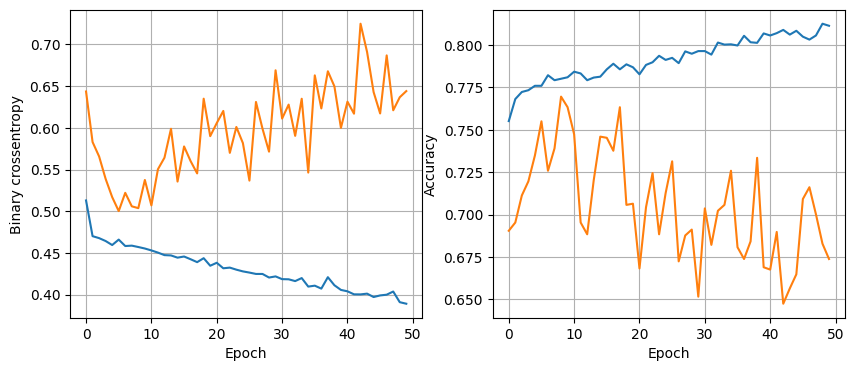

In [36]:
plot_history(history)

In [37]:
nn_model.evaluate(X_test, y_test)

66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7839 - loss: 0.6218


[0.6377743482589722, 0.7838862538337708]

In [38]:
res=nn_model.predict(X_test)
y_pred = (res > 0.65).astype(int).reshape(-1,)
print(classification_report(y_test, y_pred))

66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1561
           1       0.62      0.47      0.53       549

    accuracy                           0.79      2110
   macro avg       0.72      0.68      0.70      2110
weighted avg       0.77      0.79      0.78      2110



## Hyper Paramerter Tuning 

In [39]:
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, epochs):
  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes, activation='relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_nodes*2, activation='relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_nodes, activation='relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy',
                  metrics=['accuracy'])
  history = nn_model.fit(
    X_train, y_train, epochs=epochs, validation_split=0.2, verbose=0
  )

  return nn_model, history

32 nodes, dropout 0, lr 0.01


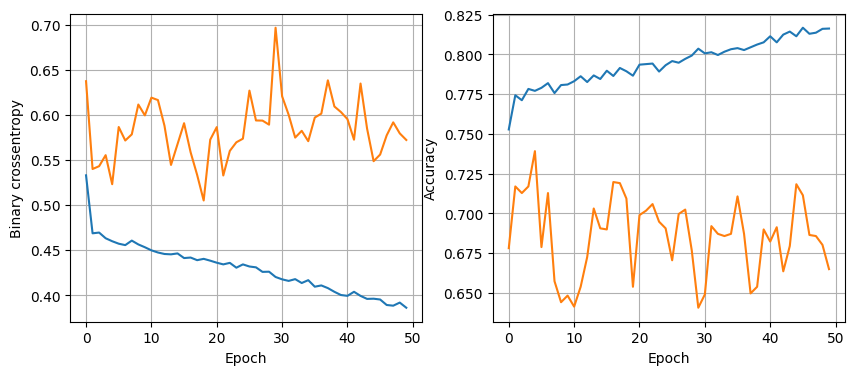

66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7904 - loss: 0.6110
32 nodes, dropout 0, lr 0.005


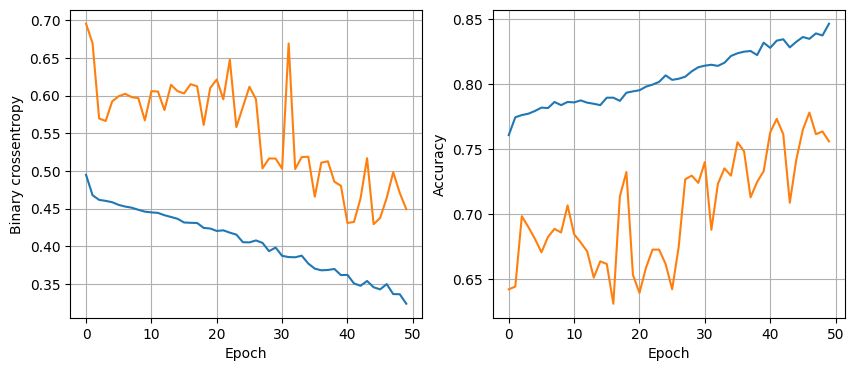

66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7677 - loss: 0.8168
32 nodes, dropout 0, lr 0.001


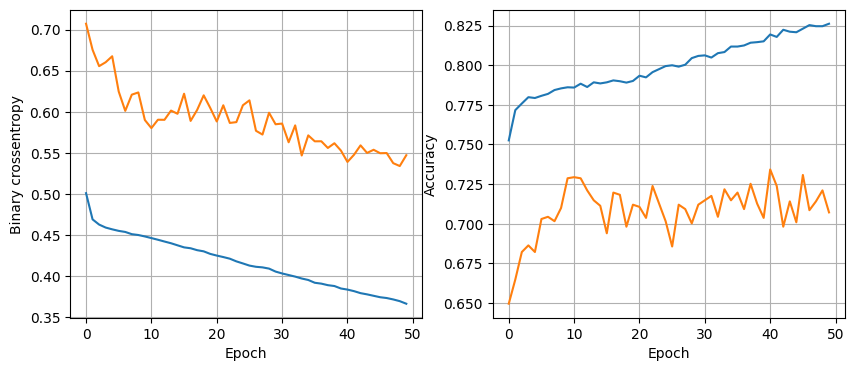

66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7890 - loss: 0.5784
32 nodes, dropout 0.2, lr 0.01


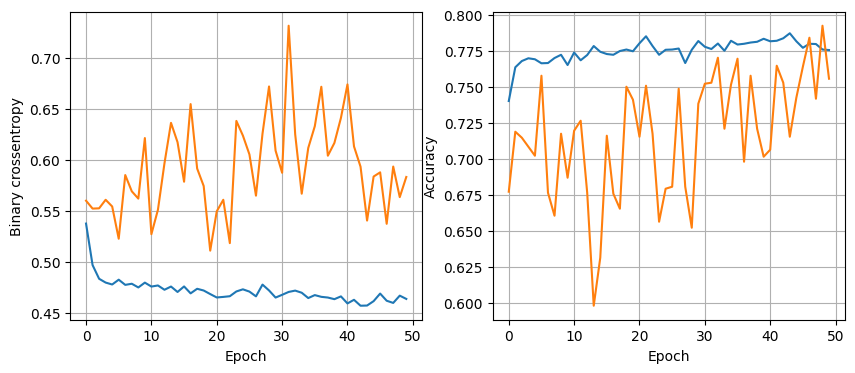

66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7847 - loss: 0.4760
32 nodes, dropout 0.2, lr 0.005


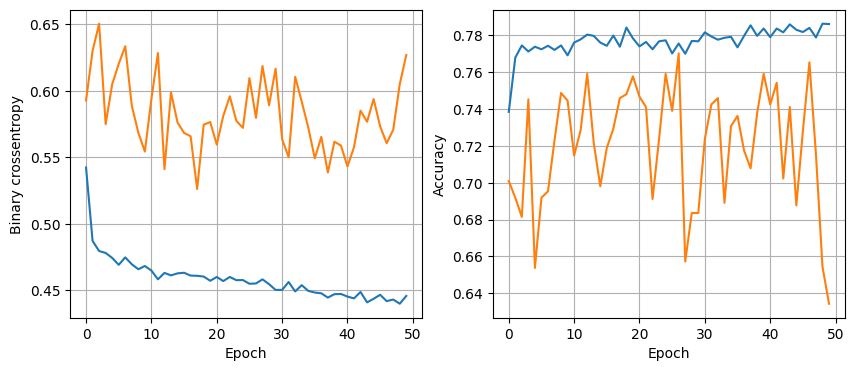

66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7919 - loss: 0.4537
32 nodes, dropout 0.2, lr 0.001


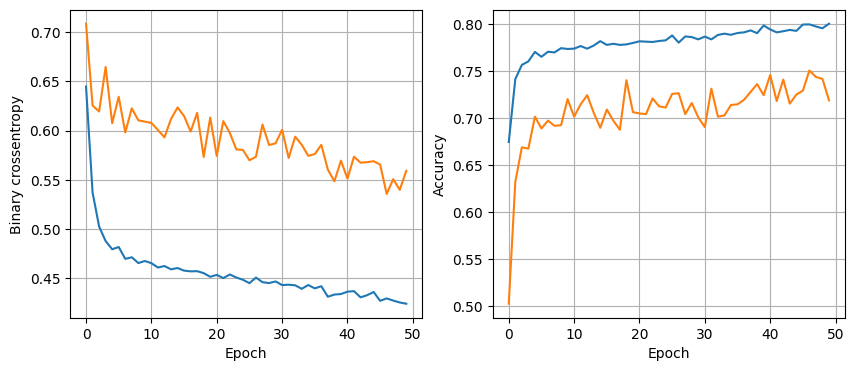

66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7993 - loss: 0.4523
64 nodes, dropout 0, lr 0.01


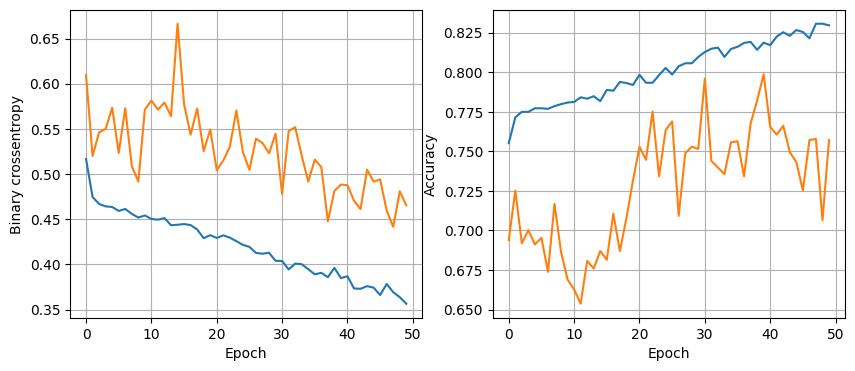

66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7651 - loss: 0.7726
64 nodes, dropout 0, lr 0.005


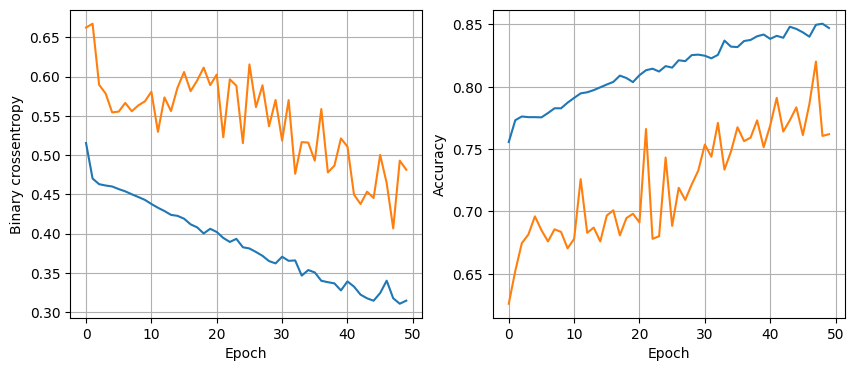

66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7756 - loss: 0.8007
64 nodes, dropout 0, lr 0.001


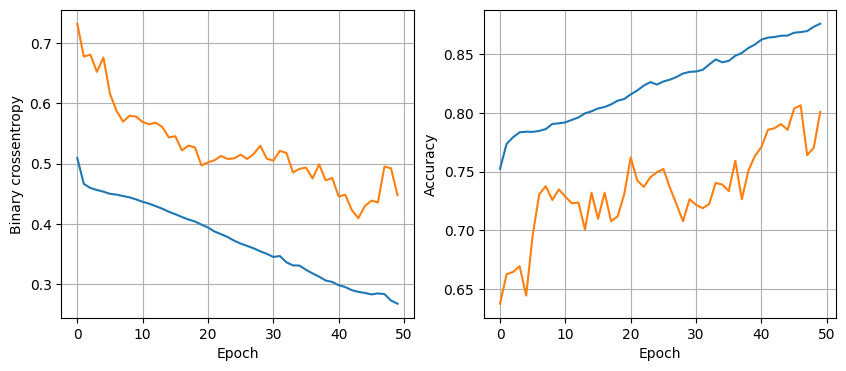

66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7751 - loss: 0.8210
64 nodes, dropout 0.2, lr 0.01


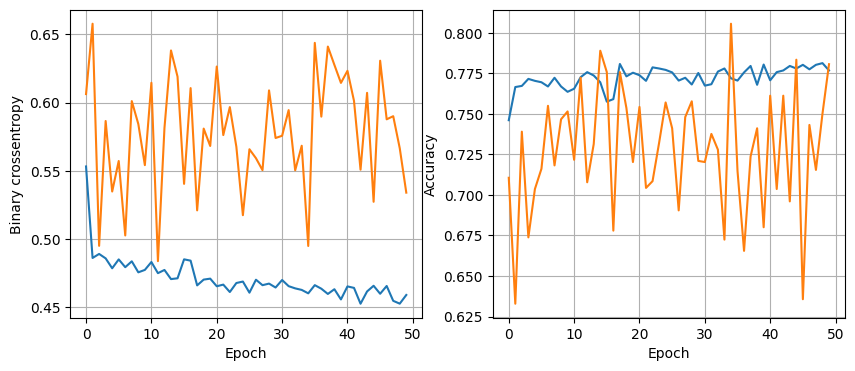

66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7522 - loss: 0.5200
64 nodes, dropout 0.2, lr 0.005


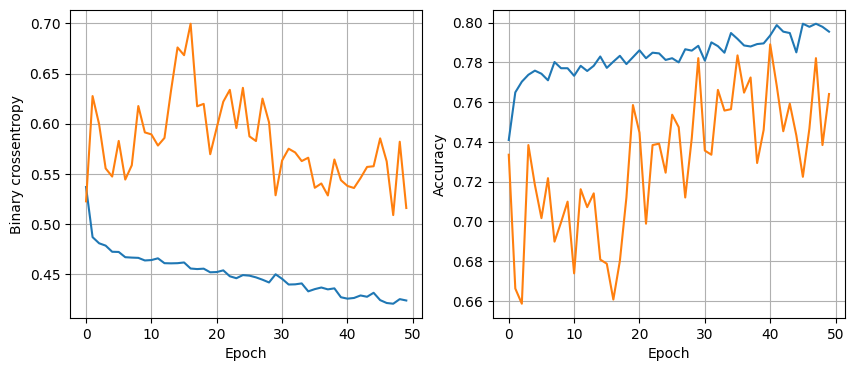

66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7753 - loss: 0.5270
64 nodes, dropout 0.2, lr 0.001


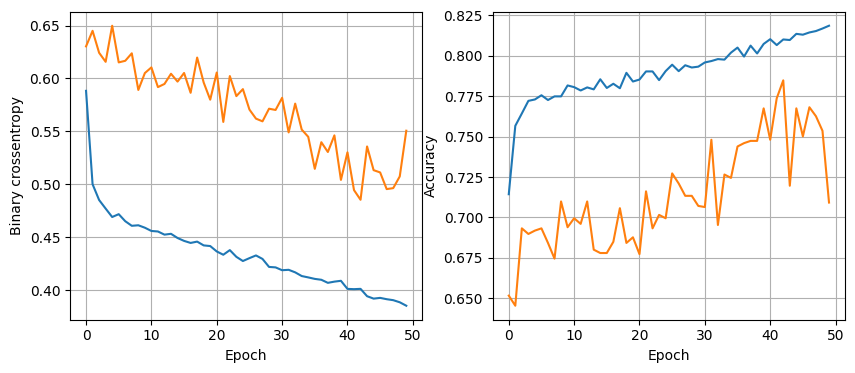

66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7955 - loss: 0.5211


In [40]:
least_val_loss = float('inf')
least_loss_model = None
epochs=50
for num_nodes in [32, 64]:
  for dropout_prob in[0, 0.2]:
    for lr in [0.01, 0.005, 0.001]:
        print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}")
        model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, epochs)
        plot_history(history)
        val_loss = model.evaluate(X_test, y_test)[0]
        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model

In [41]:
y_pred = least_loss_model.predict(X_test)
y_pred = (y_pred > 0.65).astype(int).reshape(-1,)
print(classification_report(y_test, y_pred))

66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.83      0.93      0.88      1561
           1       0.69      0.44      0.54       549

    accuracy                           0.80      2110
   macro avg       0.76      0.69      0.71      2110
weighted avg       0.79      0.80      0.79      2110



In [42]:
least_loss_model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                │ (None, 32)             │         1,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,613 (64.90 KB)

 Trainable params: 5,537 (21.63 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 11,076 (43.27 KB)